# Custom indicator example

In [6]:
from mplchart.chart import Chart
from mplchart.helper import get_prices
from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')


In [7]:
ticker = 'AAPL'
freq = 'daily'
prices = get_prices(ticker, freq=freq)
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600
...,...,...,...,...,...
2022-08-09,164.020004,165.820007,163.250000,164.919998,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500
2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200


In [8]:

@dataclass
class DEMA:
    """ Double Exponential Moving Average """
    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [9]:
res = DEMA(20)(prices)
res.tail()


date
2022-08-09    164.626963
2022-08-10    166.077791
2022-08-11    167.158058
2022-08-12    168.709315
2022-08-15    170.207651
Name: close, dtype: float64

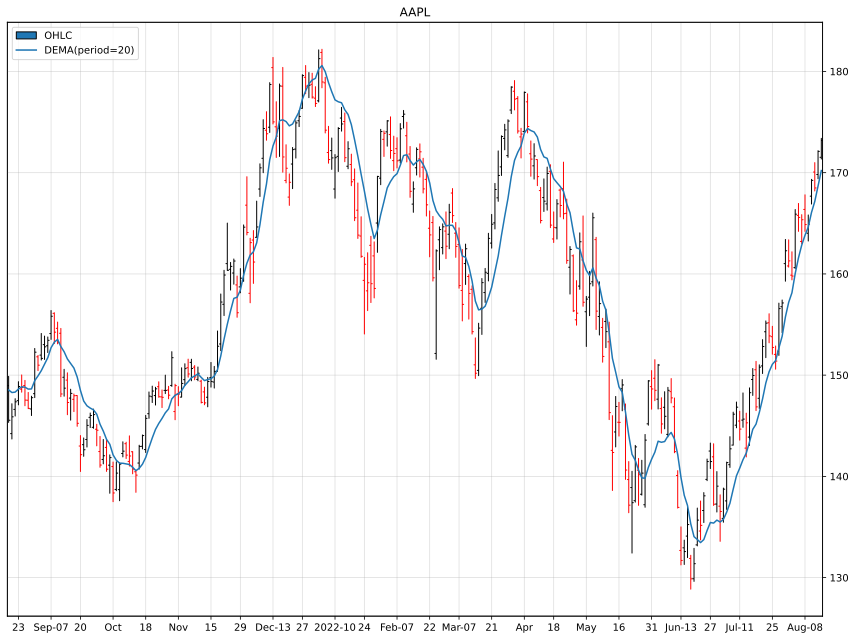

In [10]:
max_bars = 250

indicators = [
    OHLC(), DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
